In [ ]:
#install packages not in Google Colab by default
!pip install pydmd

In [ ]:
%matplotlib inline
import numpy as np
import scipy
import scipy.integrate

from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
from pydmd import DMD

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#set the path to the data
#data should be a 3D array of displacements
PATH_TO_ARRAY = '/content/gdrive/My Drive/up_array.npy'

In [ ]:
#set the desired latitude and longitude bounds
min_lat = 32
max_lat = 36
min_lon = -120
max_lon = -114

In [ ]:
#set parameters for DMD
svd_rank = 10
tlsq_rank = 2

In [ ]:
#load in data
up_array = np.load(PATH_TO_ARRAY)[:, 0:30, 0:30]

In [ ]:
#determine the resolution of the grid, found from the shape of the array
npoints_lat = np.shape(up_array)[1]
npoints_lon = np.shape(up_array)[2]

In [ ]:
#construct the grid
grid_x, grid_y = np.mgrid[min_lat:max_lat:complex(0,npoints_lat), min_lon:max_lon:complex(0,npoints_lon)]

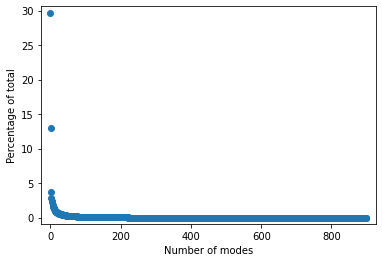

In [ ]:
array = (scipy.linalg.svdvals(np.array([snapshot.flatten() for snapshot in up_array])))**2
total = sum(array)
Percent_Array = array/total*100 # Percentage Graph
fig = plt.plot((Percent_Array), 'o')
plt.xlabel('Number of modes')
plt.ylabel('Percentage of total')
plt.margins(0.03)

Text(0, 0.5, 'Percent Variance Explained')

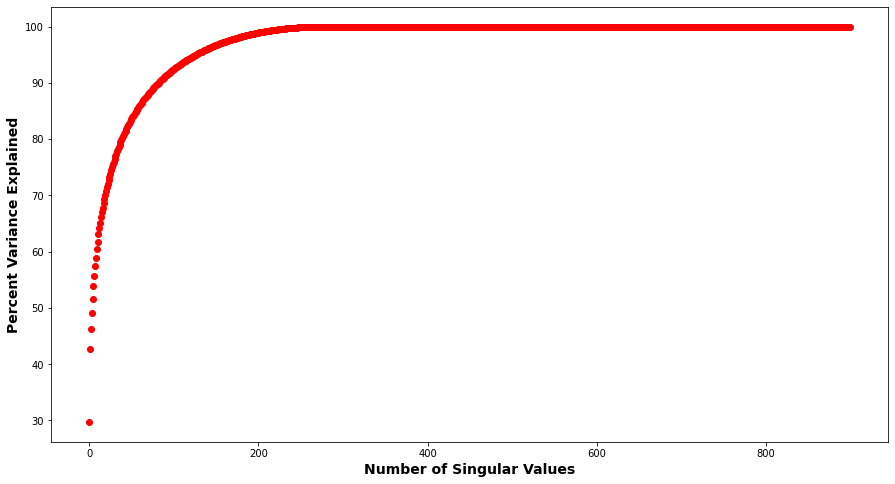

In [ ]:
cumsum = np.cumsum(Percent_Array)
# y = np.arange(1, len(x)+1)

plt.figure(figsize=(15,8))
plt.plot(cumsum,c='r' , marker='o', linestyle='none')
plt.xlabel('Number of Singular Values', fontweight='bold', fontsize=14)
plt.ylabel('Percent Variance Explained', fontweight='bold', fontsize=14)

/usr/local/lib/python3.6/dist-packages/pydmd/dmdbase.py:215: UserWarning: Input data matrix X has condition number 1.3701729290966644e+49. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  .format(cond_number))


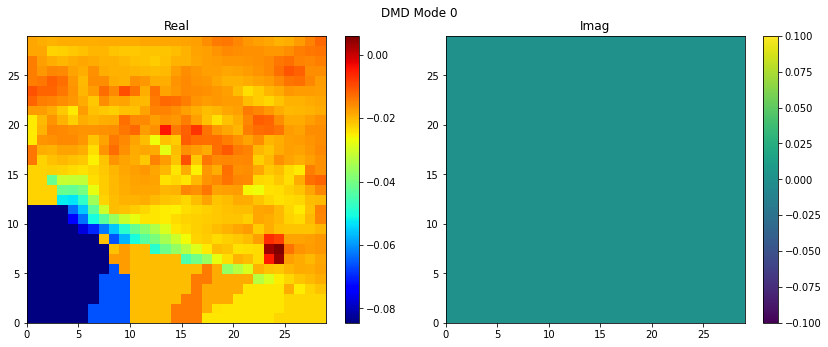

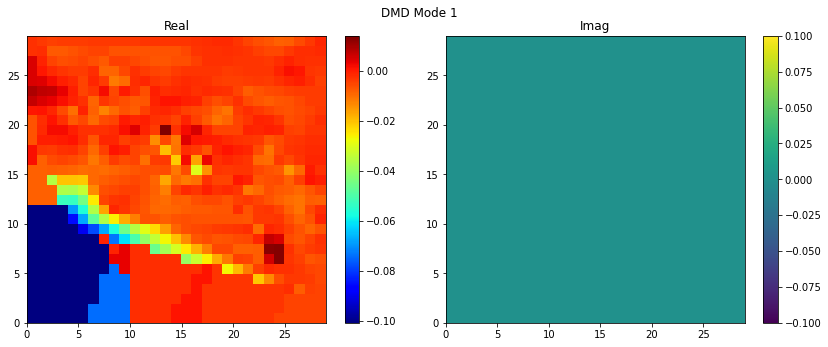

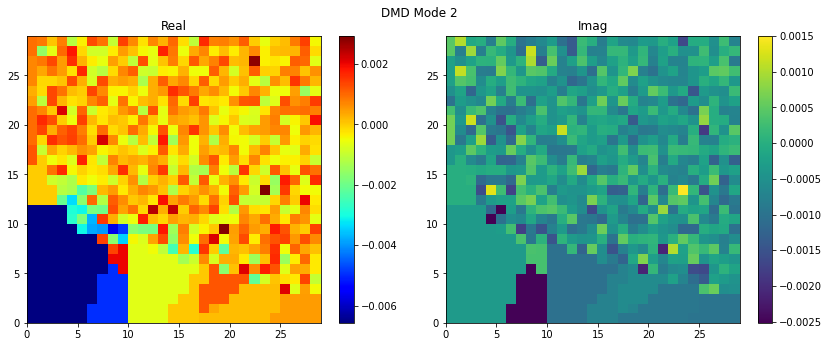

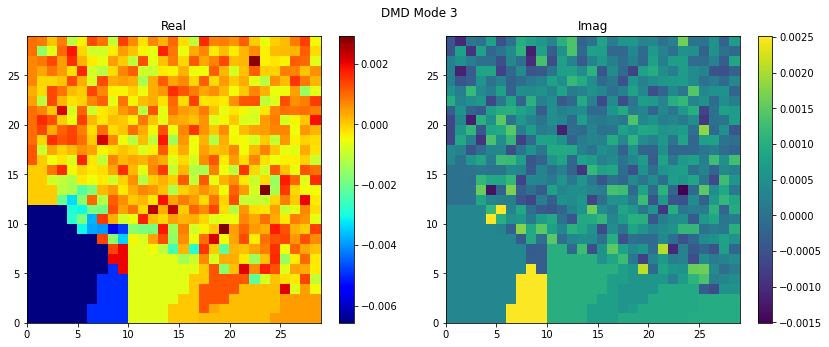

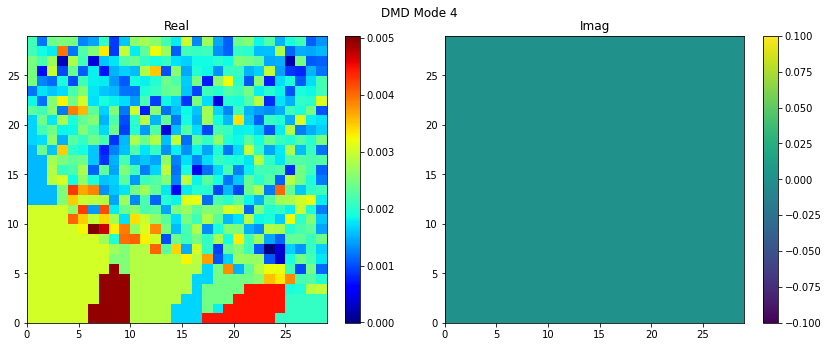

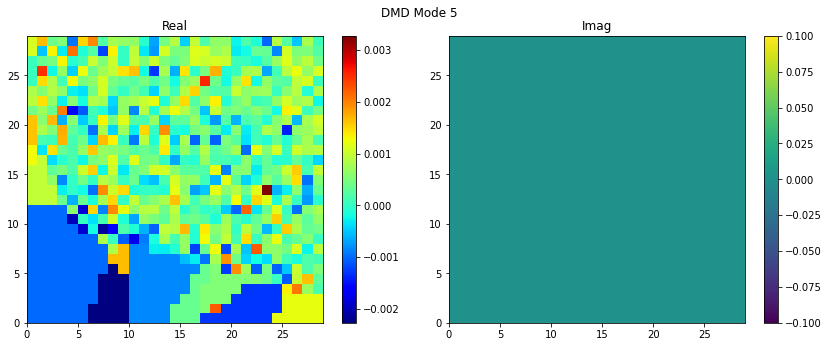

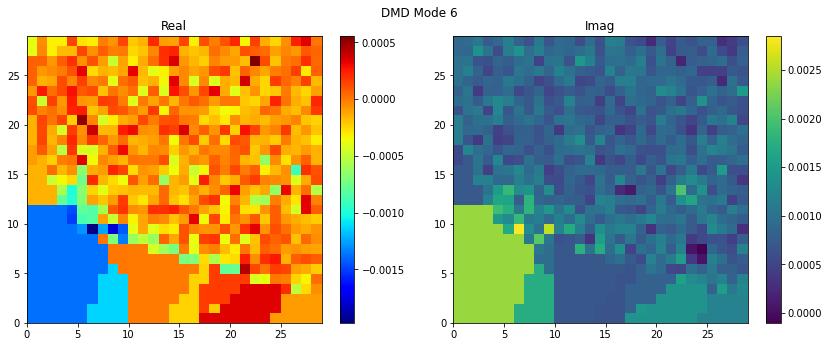

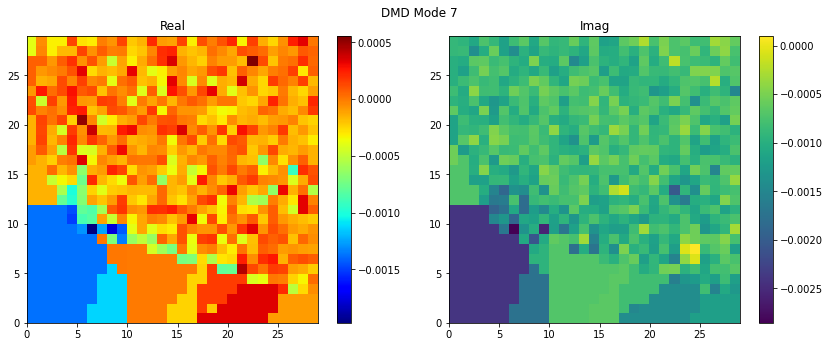

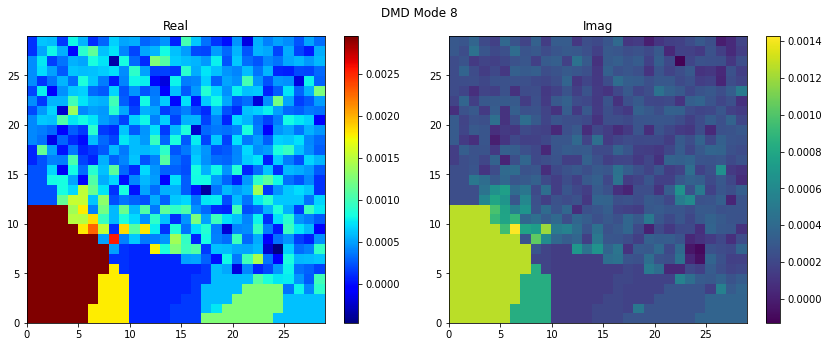

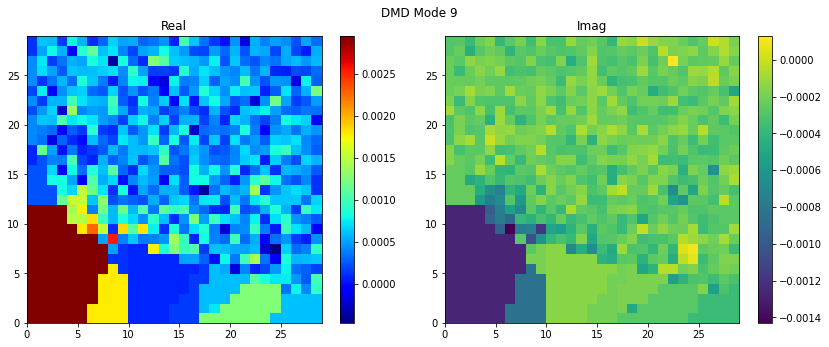

In [ ]:
#plot the modes
dmd = DMD(svd_rank, tlsq_rank, exact=True, opt=True)
dmd.fit(up_array)
dmd.plot_modes_2D(figsize=(12,5))

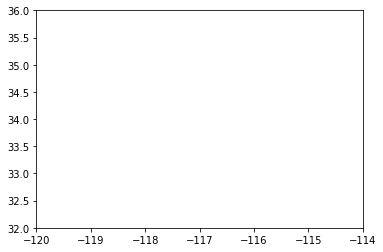

In [ ]:
#plot the animation
fig = plt.figure()

dmd_states = [state.reshape(grid_x.shape) for state in dmd.reconstructed_data.T]

frames = [
    [plt.imshow(state.real, cmap='RdYlGn', #vmin=min_displacement, vmax=max_displacement,
                  extent=(min_lon, max_lon, min_lat, max_lat), origin='lower')]
    for state in dmd_states
]

ani = animation.ArtistAnimation(fig, frames, interval=33, blit=False, repeat=False)
#ani.save('/content/gdrive/My Drive/dmd10.mp4')

HTML(ani.to_html5_video())

In [ ]:
data_flat = up_array.flatten()
dmd_flat = np.array(dmd_states).flatten().real

RV = 1 - (((data_flat - dmd_flat)**2)/(data_flat**2))

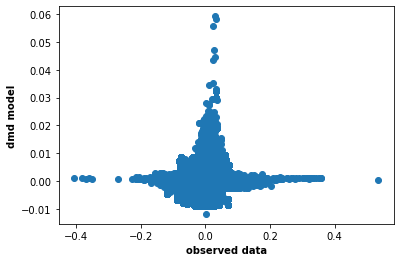

In [ ]:
plt.scatter(data_flat, dmd_flat)
plt.xlabel('observed data', weight='bold')
plt.ylabel('dmd model', weight='bold')
plt.show()

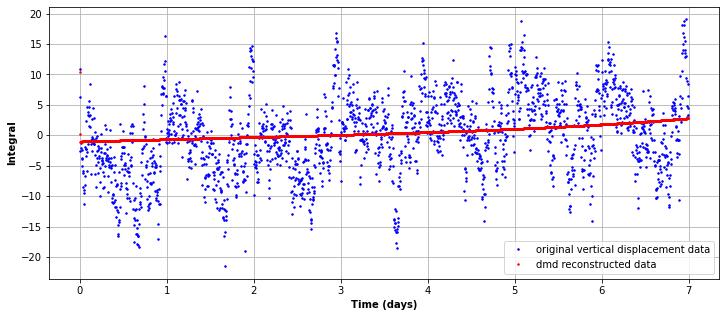

In [ ]:
compute_integral = scipy.integrate.trapz

original_int = [compute_integral(compute_integral(snapshot)).real for snapshot in up_array]
dmd_int = [compute_integral(compute_integral(state)).real for state in dmd_states]

figure = plt.figure(figsize=(12,5))
plt.plot(dmd.original_timesteps*5/(60*24), original_int, 'b.', label='original vertical displacement data', ms=3)
plt.plot(dmd.dmd_timesteps*5/(60*24), dmd_int, 'r.', label='dmd reconstructed data', ms=3)
plt.ylabel('Integral', weight='bold')
plt.xlabel('Time (days)', weight='bold')
plt.grid()
leg = plt.legend()